<a href="https://colab.research.google.com/github/roboy88/Big-Tech-Stock-Data-Analysis/blob/main/BIG_Tech_Stock_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Google Colab file upload cell
from google.colab import files
uploaded = files.upload()

# Load the Excel file using pandas
import pandas as pd

file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)
print(xls.sheet_names)  # Should show ['Companies_Stocks']


Saving Stocks_Data_10yrs.xlsx to Stocks_Data_10yrs.xlsx
['Companies_Stocks']


In [11]:
# Load the relevant sheet
df = pd.read_excel(file_name, sheet_name='Companies_Stocks')

# Preview the first few rows
df.head()


,Date,Close,High,Low,Open,Volume,Ticker
0,2015-04-17,0.53,0.54,0.53,0.53,293636000,NVDA
1,2015-04-20,0.53,0.54,0.53,0.54,231624000,NVDA
2,2015-04-21,0.53,0.54,0.53,0.54,230456000,NVDA
3,2015-04-22,0.54,0.54,0.53,0.53,207420000,NVDA
4,2015-04-23,0.54,0.54,0.52,0.53,259380000,NVDA


In [13]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ensure Volume is numeric and drop missing values
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df = df.dropna()

# Sort data for time-series calculations
df = df.sort_values(by=['Ticker', 'Date'])


In [14]:
# Add rolling averages and volatility
df['MA20'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=20).mean())
df['MA50'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=50).mean())
df['Volatility'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=20).std())

# Show updated data
df.tail()


,Date,Close,High,Low,Open,Volume,Ticker,MA20,MA50,Volatility
2511,2025-04-10,107.57,110.86,99.15,109.37,437812400,NVDA,111.4120,119.3418,8.420931
2512,2025-04-11,110.93,111.55,107.48,108.50,313417300,NVDA,110.8750,119.0676,8.067374
2513,2025-04-14,110.71,114.29,109.07,114.11,264705000,NVDA,110.4340,118.8806,7.806193
2514,2025-04-15,112.20,113.62,110.50,110.97,228966900,NVDA,110.2725,118.7916,7.730437
2515,2025-04-16,104.49,106.79,100.45,104.55,397016900,NVDA,109.6210,118.5086,7.635980


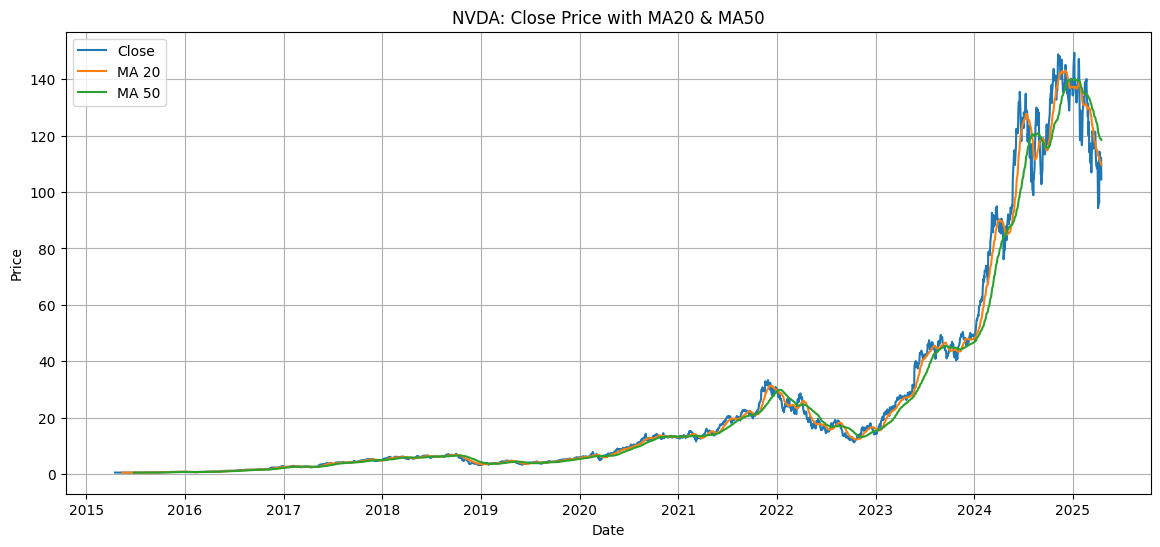

In [15]:
import matplotlib.pyplot as plt

# Filter NVDA stock
nvda_df = df[df['Ticker'] == 'NVDA'].set_index('Date')

# Plot closing price with moving averages
plt.figure(figsize=(14, 6))
plt.plot(nvda_df['Close'], label='Close')
plt.plot(nvda_df['MA20'], label='MA 20')
plt.plot(nvda_df['MA50'], label='MA 50')
plt.title('NVDA: Close Price with MA20 & MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Create pivot table for Close prices
pivot_df = df.pivot_table(index='Date', columns='Ticker', values='Close')

# Compute correlation matrix
correlation_matrix = pivot_df.corr()

# Display correlation matrix
correlation_matrix


Ticker,AMZN,GOOGL,MSFT,NVDA
Ticker,,,,
AMZN,1.000000,0.916154,0.910795,0.728999
GOOGL,0.916154,1.000000,0.979261,0.841639
MSFT,0.910795,0.979261,1.000000,0.834588
NVDA,0.728999,0.841639,0.834588,1.000000


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop missing values
pca_ready = pivot_df.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_ready)

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Show explained variance
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


Explained Variance Ratio: [0.90277449 0.07106728]
